Twoim zadaniem jest przeprowadzenie dokładnej EDA na zbiorze danych "Car Features and MSRP", który wybraliśmy dla Ciebie, a drugi na wybranym przez Ciebie zbiorze danych. 

Czyszczenie i wstępne przetwarzanie danych
Uwzględniaj brakujące wartości, w razie potrzeby konwertuj typy danych i zarządzaj wartościami odstającymi w zmiennych liczbowych.

Identyfikacja i obsługa brakujących wartości we wszystkich zmiennych.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("..\dane\data_car.csv")

In [5]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
data["Engine Fuel Type"].value_counts()

Engine Fuel Type
regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64

In [9]:
data[data["Engine Fuel Type"].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [10]:
data[data["Make"] == "Suzuki"]["Engine Fuel Type"].value_counts()
# wszystkie samochody Suzuki używają paliwa bezołowiowego, ktory jest najczestwa wartoscia w tej kolumnie 

Engine Fuel Type
regular unleaded    348
Name: count, dtype: int64

In [11]:
data["Engine Fuel Type"] = data["Engine Fuel Type"].fillna(data["Engine Fuel Type"].value_counts().idxmax())

In [12]:
data.loc[11321:11323]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [13]:
data["Engine HP"] = data["Engine HP"].fillna(data["Engine HP"].median())
data["Engine Cylinders"] = data["Engine Cylinders"].fillna(data["Engine Cylinders"].median())

In [14]:
data["Number of Doors"] = data["Number of Doors"].fillna(data["Number of Doors"].median())

In [15]:
data[data["Market Category"].isna()].head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000


In [16]:
data["Market Category"] = data["Market Category"].fillna(data["Market Category"].value_counts().idxmax())

In [17]:
data.loc[87:93,]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,36,26,2009,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,36,26,2009,2000
89,Nissan,200SX,1996,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Performance,Compact,Coupe,29,21,2009,2000
90,Nissan,200SX,1997,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Performance,Compact,Coupe,29,21,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,35,25,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,35,25,2009,2000


In [18]:
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

W razie potrzeby przekonwertuj typy danych (np. przekonwertuj “Year” na typ “datetime”, skategoryzuj “Transmission Type”).
Wykrywanie i usuwanie wszelkich wartości odstających w zmiennych liczbowych, takich jak “HP silnika” i “liczba drzwi”.

In [19]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [20]:
data["Transmission Type"] = data["Transmission Type"].astype("category")
# data["Year"] = data["Year"].astype("datetime64[ns]")

In [21]:
data.dtypes

Make                   object
Model                  object
Year                    int64
Engine Fuel Type       object
Engine HP             float64
Engine Cylinders      float64
Transmission Type    category
Driven_Wheels          object
Number of Doors       float64
Market Category        object
Vehicle Size           object
Vehicle Style          object
highway MPG             int64
city mpg                int64
Popularity              int64
MSRP                    int64
dtype: object

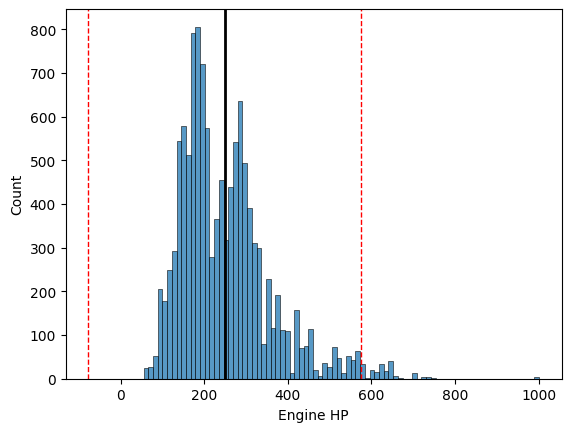

In [22]:
ax = sns.histplot(data=data, x="Engine HP")
ax.axvline(x=data["Engine HP"].mean(), color="k", lw=2)
ax.axvline(x=data["Engine HP"].mean()+ data["Engine HP"].std()*3, color="r", lw=1, ls="--")
ax.axvline(x=data["Engine HP"].mean()- data["Engine HP"].std()*3, color="r", lw=1, ls="--")

In [23]:
engine_mean = data["Engine HP"].mean()
engine_std = data["Engine HP"].std()
print(engine_mean)
print(engine_std)

249.2564210172906
108.88844365482838


In [24]:
engine_upper_lim = engine_mean + engine_std * 3
engine_lower_lim = engine_mean - engine_std * 3
print(engine_upper_lim)
print(engine_lower_lim)

575.9217519817757
-77.40890994719453


In [25]:
mask = ((data["Engine HP"] < engine_upper_lim) & (data["Engine HP"] > engine_lower_lim))

In [26]:
data = data[mask]

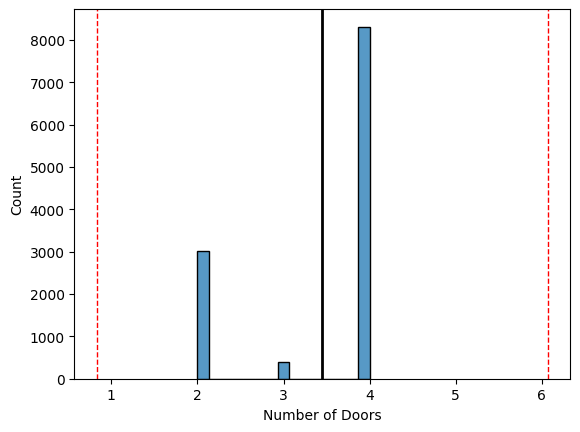

In [27]:
ax = sns.histplot(data=data, x="Number of Doors")
ax.axvline(x=data["Number of Doors"].mean(), color="k", lw=2)
ax.axvline(x=data["Number of Doors"].mean()+ data["Number of Doors"].std()*3, color="r", lw=1, ls="--")
ax.axvline(x=data["Number of Doors"].mean()- data["Number of Doors"].std()*3, color="r", lw=1, ls="--")

In [28]:
data["Number of Doors"].value_counts()
# nie ma warotsci odstajacych

Number of Doors
4.0    8313
2.0    3016
3.0     395
Name: count, dtype: int64

Obliczanie statystyk podsumowujących dla cech liczbowych i zliczeń częstotliwości dla zmiennych kategorialnych.

In [29]:
# statystyki dla wartosci cech liczbowych
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11724.000000,11724.000000,11724.000000,11724.000000,11724.000000,11724.000000,11724.000000,11724.000000
mean,2010.325486,242.989338,5.557404,3.451808,26.756312,19.849113,1559.196008,36957.984903
std,7.617721,97.603984,1.678460,0.873065,8.876083,9.009185,1447.096312,40019.712194
min,1990.000000,55.000000,0.000000,2.000000,12.000000,8.000000,2.000000,2000.000000
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,20895.000000
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,29740.000000
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,41450.000000
max,2017.000000,573.000000,12.000000,4.000000,354.000000,137.000000,5657.000000,492425.000000


In [30]:
data["Transmission Type"].value_counts()

Transmission Type
AUTOMATIC           8183
MANUAL              2881
AUTOMATED_MANUAL     573
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [31]:
data["Make"].value_counts().head(10)

Make
Chevrolet     1101
Ford           877
Volkswagen     809
Toyota         746
Dodge          602
Nissan         556
GMC            515
Honda          449
Mazda          423
Cadillac       395
Name: count, dtype: int64

In [32]:
data["Model"].value_counts().head()

Model
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: count, dtype: int64

In [33]:
data["Engine Fuel Type"].value_counts()

Engine Fuel Type
regular unleaded                                7175
premium unleaded (required)                     1842
premium unleaded (recommended)                  1515
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         39
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64

In [34]:
data["Driven_Wheels"].value_counts()

Driven_Wheels
front wheel drive    4787
rear wheel drive     3264
all wheel drive      2271
four wheel drive     1402
Name: count, dtype: int64

In [35]:
data["Market Category"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Factory Tuner,Luxury,High-Performance
1                           Luxury,Performance
2                      Luxury,High-Performance
3                           Luxury,Performance
4                                       Luxury
                         ...                  
11909               Crossover,Hatchback,Luxury
11910               Crossover,Hatchback,Luxury
11911               Crossover,Hatchback,Luxury
11912               Crossover,Hatchback,Luxury
11913                                   Luxury
Name: Market Category, Length: 11724, dtype: object>

In [36]:
data["Vehicle Size"].value_counts()

Vehicle Size
Compact    4684
Midsize    4314
Large      2726
Name: count, dtype: int64

In [37]:
data["Vehicle Style"].value_counts()

Vehicle Style
Sedan                  3013
4dr SUV                2482
Coupe                  1115
Convertible             742
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   590
2dr Hatchback           506
Passenger Minivan       417
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
Name: count, dtype: int64

Utwórz histogramy lub wykresy pudełkowe dla zmiennych liczbowych, aby przeanalizować rozkład mocy silnika, cylindrów silnika i MSRP.
Wygeneruj wykresy słupkowe dla zmiennych kategorycznych, aby zwizualizować liczbę samochodów według marki, typu skrzyni biegów i napędzanych kół.
Użyj wykresów rozrzutu, aby zbadać potencjalne zależności między mocą silnika a MSRP, rokiem marki a MSRP itp.

[Text(0.5, 1.0, 'Rozkład mocy silnika'), Text(0, 0.5, 'Moc silnika')]

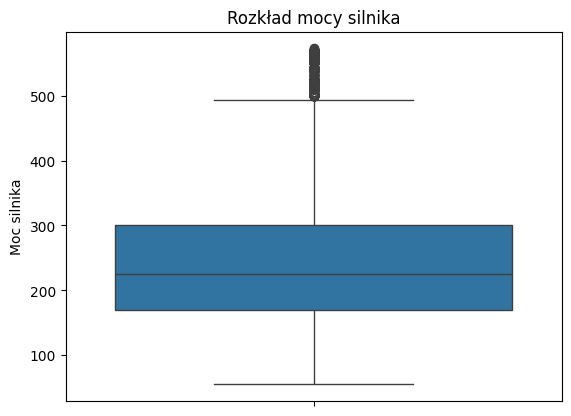

In [38]:
ax = sns.boxplot(data=data["Engine HP"])
ax.xaxis.set_tick_params(rotation=90)
ax.set(title="Rozkład mocy silnika", ylabel="Moc silnika")

[Text(0.5, 1.0, 'Rozkład ilości cylindrów'), Text(0, 0.5, 'Ilość cylindrów')]

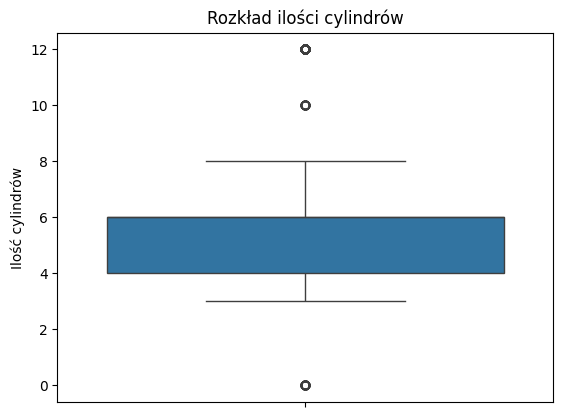

In [39]:
ax = sns.boxplot(data=data["Engine Cylinders"])
ax.xaxis.set_tick_params(rotation=90)
ax.set(title="Rozkład ilości cylindrów", ylabel="Ilość cylindrów")

[Text(0.5, 1.0, 'Rozkład sugerowanej ceny detalicznej'), Text(0, 0.5, 'Cena')]

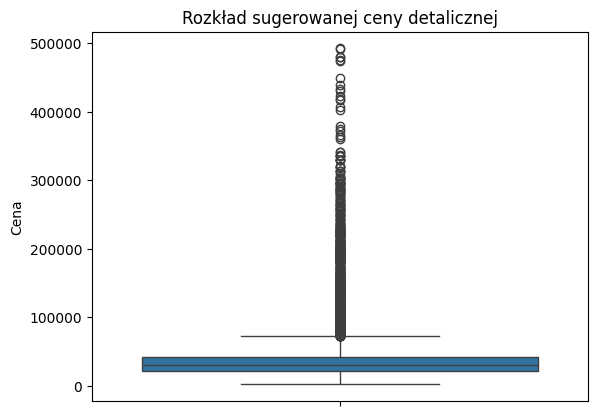

In [40]:
ax = sns.boxplot(data=data["MSRP"])
ax.xaxis.set_tick_params(rotation=90)
ax.set(title="Rozkład sugerowanej ceny detalicznej", ylabel="Cena")

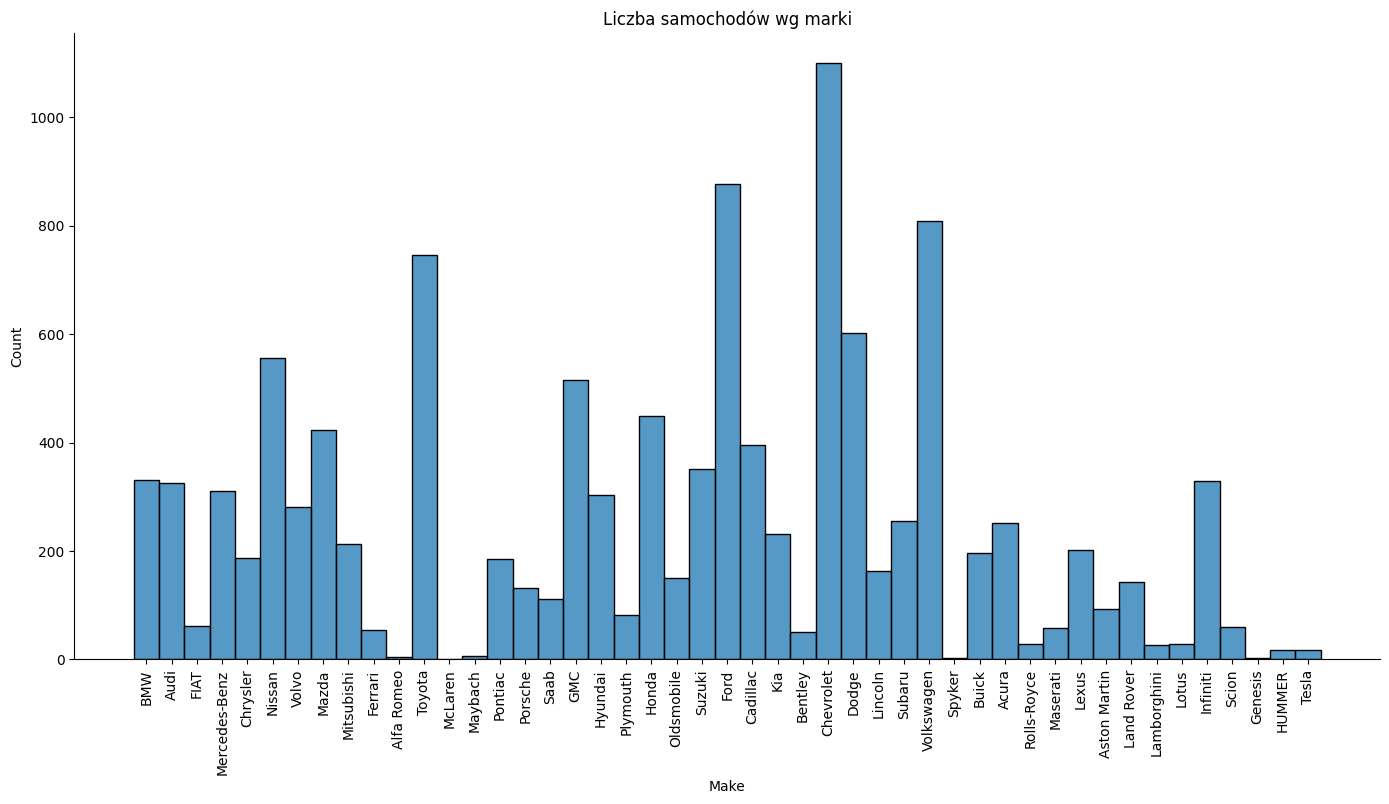

In [41]:
ax = sns.displot(data["Make"], height=7, aspect=2)
ax.set_xticklabels(rotation=90)
ax.set(title="Liczba samochodów wg marki")

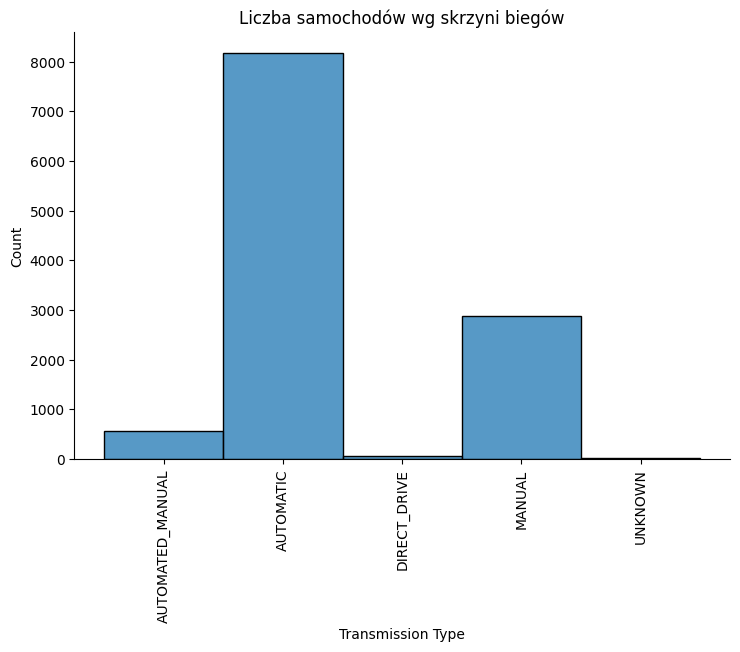

In [42]:
ax = sns.displot(data["Transmission Type"], height=5, aspect=1.5)
ax.set_xticklabels(rotation=90)
ax.set(title="Liczba samochodów wg skrzyni biegów")

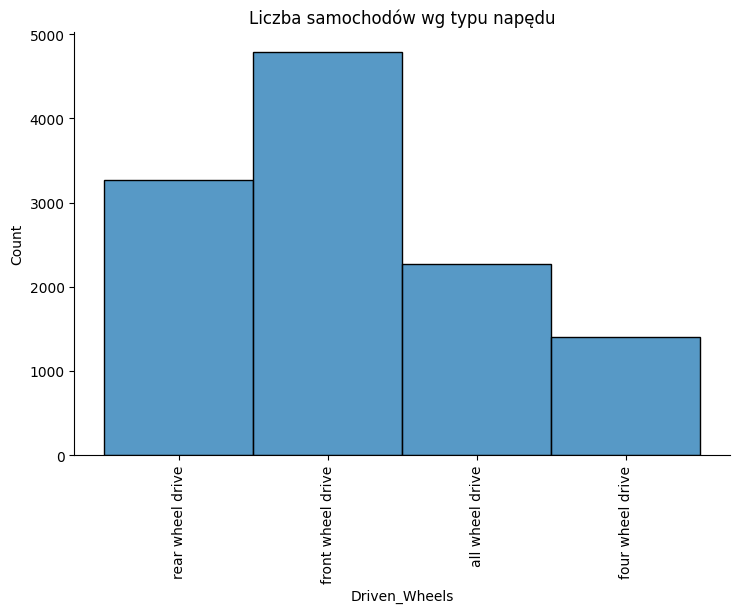

In [43]:
ax = sns.displot(data["Driven_Wheels"], height=5, aspect=1.5)
ax.set_xticklabels(rotation=90)
ax.set(title="Liczba samochodów wg typu napędu")

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11724 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Make               11724 non-null  object  
 1   Model              11724 non-null  object  
 2   Year               11724 non-null  int64   
 3   Engine Fuel Type   11724 non-null  object  
 4   Engine HP          11724 non-null  float64 
 5   Engine Cylinders   11724 non-null  float64 
 6   Transmission Type  11724 non-null  category
 7   Driven_Wheels      11724 non-null  object  
 8   Number of Doors    11724 non-null  float64 
 9   Market Category    11724 non-null  object  
 10  Vehicle Size       11724 non-null  object  
 11  Vehicle Style      11724 non-null  object  
 12  highway MPG        11724 non-null  int64   
 13  city mpg           11724 non-null  int64   
 14  Popularity         11724 non-null  int64   
 15  MSRP               11724 non-null  int64   
dtypes: catego

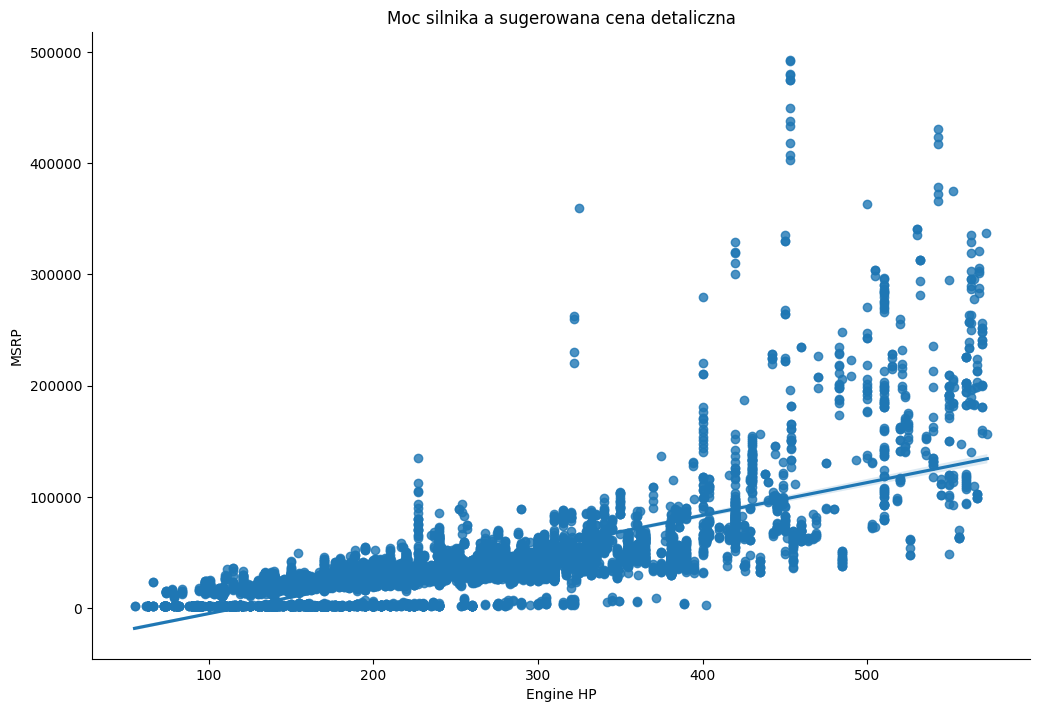

In [45]:
ax = sns.lmplot(x="Engine HP",
           y="MSRP",
           data = data,
           height=7,
           aspect=1.5)
ax.set(title="Moc silnika a sugerowana cena detaliczna")

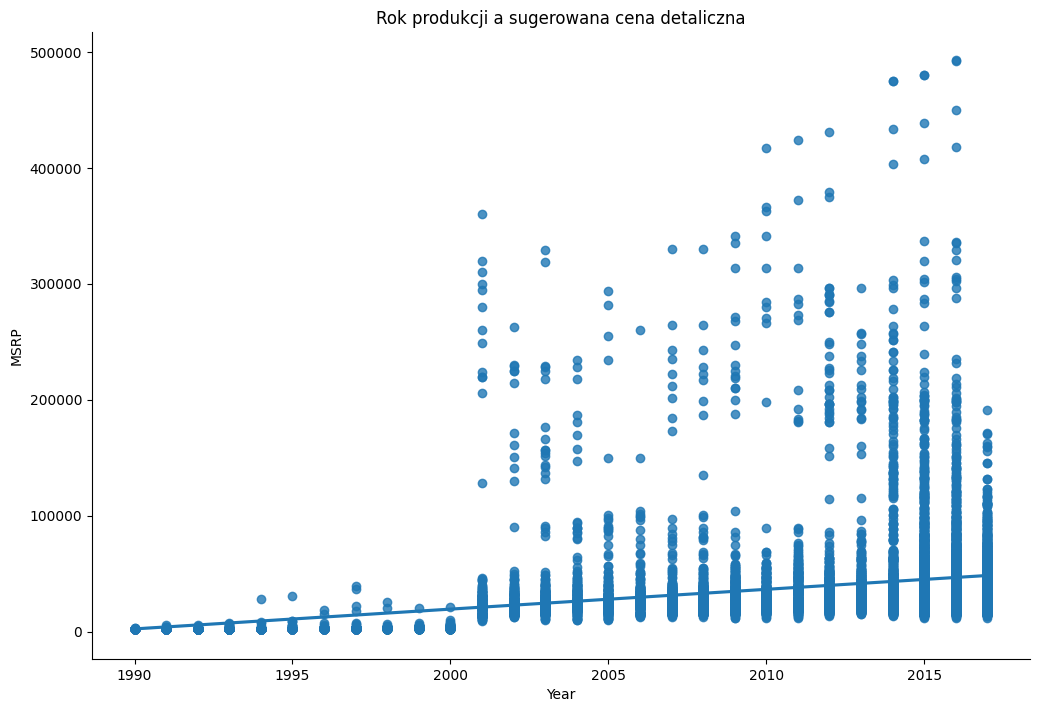

In [46]:
ax = sns.lmplot(x="Year",
           y="MSRP",
           data = data,
           height=7,
           aspect=1.5)
ax.set(title="Rok produkcji a sugerowana cena detaliczna")

Oblicz średnią MSRP dla samochodów pogrupowanych według marki, roku i innych odpowiednich kategorii. Określ, które kategorie mają wyższe lub niższe ceny.


In [47]:
data.dtypes

Make                   object
Model                  object
Year                    int64
Engine Fuel Type       object
Engine HP             float64
Engine Cylinders      float64
Transmission Type    category
Driven_Wheels          object
Number of Doors       float64
Market Category        object
Vehicle Size           object
Vehicle Style          object
highway MPG             int64
city mpg                int64
Popularity              int64
MSRP                    int64
dtype: object

In [48]:
msrp_mean = data[["Make", "Year", "MSRP"]].groupby(["Make", "Year"]).mean()

In [49]:
msrp_mean.sort_values(by="MSRP", ascending=False).head(10)

MSRP
Make        Year               
Maybach     2012  404750.000000
Rolls-Royce 2015  401970.833333
            2016  401707.142857
Maybach     2011  398000.000000
Rolls-Royce 2014  392096.666667
Maybach     2010  391500.000000
Bentley     2010  351995.000000
            2003  323990.000000
Ferrari     2011  313088.000000
            2010  313088.000000

Przeanalizuj trendy w czasie, sprawdzając, jak zmieniała się średnia moc konia lub MSRP w poszczególnych latach.